# Load Noisy_Bowl

In [34]:
import numpy as np
np.random.seed(1)
x = np.arange(-1, 1, 0.05)
y = np.arange(-1, 1, 0.05)
X, Y = np.meshgrid(x, y)  
Z = X**2 + Y**2 + 0.3 * np.random.normal(0, 1, X.shape)

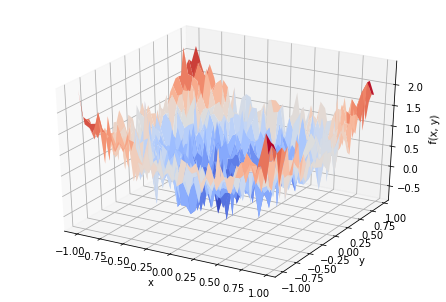

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6, 4))
ax = Axes3D(fig)  
ax.plot_surface(X, Y, Z,
                rstride=2,
                cstride=2,
                cmap=plt.cm.coolwarm,
                linewidth=0.5,
                antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()

# Load Noisy_Bowl Functional Form

In [36]:
def load_data():
    import numpy as np
    np.random.seed(1)
    
    x = np.arange(-1, 1, 0.05)
    y = np.arange(-1, 1, 0.05)
    X, Y = np.meshgrid(x, y)    
    Z = X**2 + Y**2 + 0.3 * np.random.normal(0, 1, X.shape)
    
    x_ = X.reshape([-1,]).astype(np.float32)
    y_ = Y.reshape([-1,]).astype(np.float32)
    z_ = Z.reshape([-1,]).astype(np.float32)
    
    return x_, y_, z_

In [37]:
import numpy as np

x_, y_, z_ = load_data()

X = x_.reshape(40, 40)
Y = y_.reshape(40, 40)
Z = z_.reshape(40, 40)

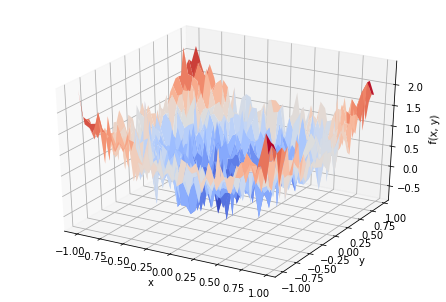

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6, 4))
ax = Axes3D(fig)  
ax.plot_surface(X, Y, Z,
                rstride=2,
                cstride=2,
                cmap=plt.cm.coolwarm,
                linewidth=0.5,
                antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()

# Fit Parabola

In [16]:
""" Hyperparameter """
lr = 1e-2
epoch = 1000
batch_size = 100

In [17]:
""" Data Generation """

' Data Generation '

In [18]:
def load_data():
    import numpy as np
    np.random.seed(1)
    
    x = np.arange(-1, 1, 0.05)
    y = np.arange(-1, 1, 0.05)
    X, Y = np.meshgrid(x, y)    
    Z = X**2 + Y**2 + 0.3 * np.random.normal(0, 1, X.shape)
    
    x_ = X.reshape([-1,]).astype(np.float32)
    y_ = Y.reshape([-1,]).astype(np.float32)
    z_ = Z.reshape([-1,]).astype(np.float32)
    
    return x_, y_, z_

In [19]:
import numpy as np

data_x, data_y, data_z = load_data()
data_x, data_y, data_z = data_x.reshape((-1,1)), data_y.reshape((-1,1)), data_z.reshape((-1,1))

data_xx = data_x**2
data_xy = data_x * data_y
data_yy = data_y**2

x_train = np.concatenate([data_x, data_y, data_xx, data_xy, data_yy], axis=1)
y_train = data_z

print(x_data.shape, y_data.shape)

(1600, 5) (1600, 1)


In [20]:
""" Graph """

' Graph Construction '

In [24]:
import tensorflow as tf
import numpy as np
tf.reset_default_graph()
tf.random.set_random_seed(337)
np.random.seed(337)

In [25]:
# placeholders
x = tf.placeholder(tf.float32, shape=(None, 5), name='x') 
y = tf.placeholder(tf.float32, shape=(None, 1), name='y')

In [26]:
init_w = tf.keras.initializers.VarianceScaling(mode='fan_avg')
init_b = tf.keras.initializers.zeros()

# weights
W = tf.get_variable("W", (5, 1), initializer=init_w)
b = tf.get_variable("b", (), initializer=init_b)

In [27]:
# prediction
y_pred = (x @ W) + b

In [28]:
# loss
loss = tf.nn.l2_loss(y - y_pred)

In [29]:
# optimizer
train = tf.train.AdamOptimizer(learning_rate=lr).minimize(loss)

In [ ]:
# variable initializer
init = tf.global_variables_initializer()

In [ ]:
""" Session """

In [30]:
with tf.Session() as sess:
    
    sess.run(init)
    
    loss_trace = []

    for i in range(epoch):
        idx = np.arange(x_train.shape[0])
        np.random.shuffle(idx)
        x_epoch = x_train[idx]
        y_epoch = y_train[idx]
        for k in range(x_train.shape[0]//batch_size):
            x_batch = x_epoch[k*batch_size:(k+1)*batch_size]
            y_batch = y_epoch[k*batch_size:(k+1)*batch_size]
            feed_dict = {x:x_batch, y:y_batch}
            loss_run, _ = sess.run([loss, train], feed_dict=feed_dict)
            loss_trace.append(loss_run)
    
    feed_dict = {x:x_train, y:y_train}
    y_train_pred = sess.run(y_pred, feed_dict=feed_dict)

In [ ]:
""" Report """

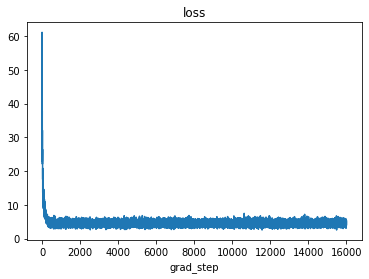

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
ax.plot(loss_trace)
ax.set_title('loss')
ax.set_xlabel('grad_step')
plt.show()

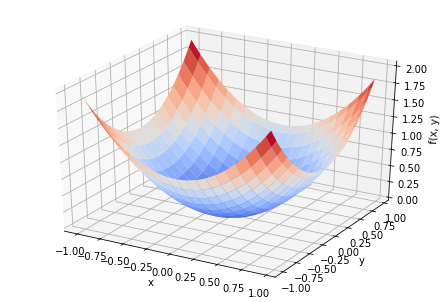

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(6, 4))
ax = Axes3D(fig) 
X = data_x.reshape((40,40)) 
Y = data_y.reshape((40,40)) 
Z = y_train_pred.reshape((40,40)) 
ax.plot_surface(X, Y, Z,
                rstride=2,
                cstride=2,
                cmap=plt.cm.coolwarm,
                linewidth=0.5,
                antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.show()